# CPTR 512 Programming in Data Analytics

Harvey Alférez, PhD

## Unit 2. Explore and clean data

### Exploring data

See additional details at: https://rafalab.github.io/dsbook/programming-basics.html, https://rafalab.github.io/dsbook/tidyverse.html, and https://rafalab.github.io/dsbook/importing-data.html

Conditional expressions:

In [8]:
a <- 0

if(a!=0){
  print(1/a)
} else{
  print("No reciprocal for 0.")
  #reciprocal: the inverse of a value or a number. For example, the reciprocal of 9 is 1/9 
}


[1] "No reciprocal for 0."


In [9]:
library(dslabs)
head(murders)
murder_rate <- murders$total / murders$population*100000

ind <- which.min(murder_rate)
print(ind)

if(murder_rate[ind] < 0.5){
  print(murders$state[ind]) 
} else{
  print("No state has murder rate that low")
}

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


[1] 46
[1] "Vermont"


In [10]:
if(murder_rate[ind] < 0.25){
  print(murders$state[ind]) 
} else{
  print("No state has a murder rate that low.")
}

[1] "No state has a murder rate that low."


In [11]:
#A related function that is very useful is ifelse. This function takes three arguments: 
#a logical and two possible answers. If the logical is TRUE, the value in the second argument is returned 
#and if FALSE, the value in the third argument is returned. Here is an example:

#ifelse(test, yes, no)

a <- 0
ifelse(a > 0, 1/a, NA)

[1] NA

Defining functions:

In [12]:
#As you become more experienced, you will find yourself needing to perform the same operations over and over. 
#A simple example is computing averages. 

avg <- function(x){
  s <- sum(x)
  n <- length(x)
  s/n
}

In [15]:
x <- 1:100
identical(mean(x), avg(x))
mean(x) != avg(x)
help(identical)

[1] TRUE

[1] FALSE

For loops:

In [8]:
for(i in 1:5){
  print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


[1] "n"   " = " "1"  
[1] "x"   " = " "1"  
[1] "s_n" " = " "1"  
[1] "n"   " = " "2"  
[1] "x"   " = " "1"   "2"  
[1] "s_n" " = " "3"  
[1] "n"   " = " "3"  
[1] "x"   " = " "1"   "2"   "3"  
[1] "s_n" " = " "6"  
[1] "n"   " = " "4"  
[1] "x"   " = " "1"   "2"   "3"   "4"  
[1] "s_n" " = " "10" 
[1] "n"   " = " "5"  
[1] "x"   " = " "1"   "2"   "3"   "4"   "5"  
[1] "s_n" " = " "15" 
[1] "n"   " = " "6"  
[1] "x"   " = " "1"   "2"   "3"   "4"   "5"   "6"  
[1] "s_n" " = " "21" 
[1] "n"   " = " "7"  
[1] "x"   " = " "1"   "2"   "3"   "4"   "5"   "6"   "7"  
[1] "s_n" " = " "28" 
[1] "n"   " = " "8"  
 [1] "x"   " = " "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"  
[1] "s_n" " = " "36" 
[1] "n"   " = " "9"  
 [1] "x"   " = " "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"  
[1] "s_n" " = " "45" 
[1] "n"   " = " "10" 
 [1] "x"   " = " "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10" 
[1] "s_n" " = " "55" 
[1] "n"   " = " "11" 
 [1] "x"   " = " "1"   "2"   "3"   "4"   "5" 

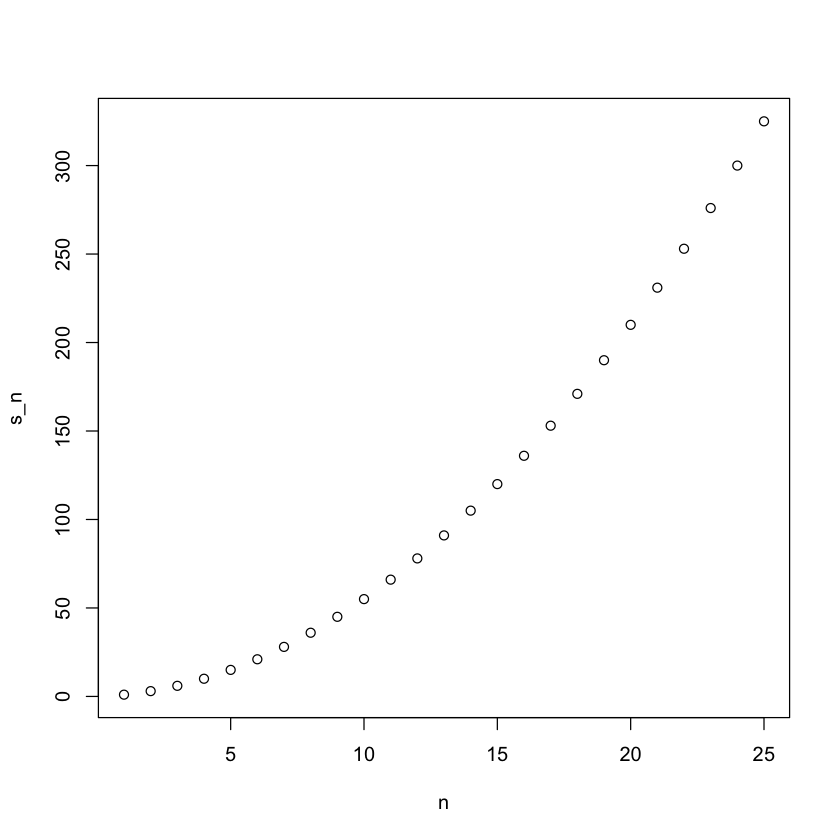

In [42]:
compute_s_n <- function(n){
  x <- 1:n #The 1:n syntax generates a sequence of integers starting from 1 and ending at n.
  print(c("x"," = ",x))
  sum(x)
}

m <- 25
s_n <- vector(length = m) # create an empty vector
for(n in 1:m){
  print(c("n"," = ",n))
  s_n[n] <- compute_s_n(n)
  print(c("s_n"," = ", s_n[n]))  
}

n <- 1:m
plot(n, s_n)

Vectorization and functionals:

In [10]:
#Although for-loops are an important concept to understand, in R we rarely use them. 
#As you learn more R, you will realize that vectorization is preferred over for-loops 
#since it results in shorter and clearer code. 

x <- 1:10
sqrt(x)
y <- 1:10
x*y

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

[1]   1   4   9  16  25  36  49  64  81 100

In [11]:
#Functionals are functions that help us apply the same function to each entry in a vector, matrix, data frame, 
#or list. Here we cover the functional that operates on numeric, logical, and character vectors: sapply.

#The function sapply permits us to perform element-wise operations on any function. Here is how it works:


x <- 1:10
sapply(x, sqrt)
#Each element of x is passed on to the function sqrt and the result is returned. 
#These results are concatenated. In this case, the result is a vector of the same length as the original x. 

n <- 1:25
s_n <- sapply(n, compute_s_n)
s_n

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

[1]   1   3   6  10  15  21  28  36  45  55  66  78  91 105 120 136 153 171 190
[20] 210 231 253 276 300 325

The Tidyverse:

In [8]:
#We say that a data table is in tidy format if each row represents one observation and columns represent 
#the different variables available for each of these observations.
#install.packages("https://cran.r-project.org/src/contrib/vctrs_0.4.1.tar.gz", repo=NULL, type="source")
library(tidyverse)
library(dslabs) 
data(murders)
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


Manipulating dataframes:

In [10]:
#Adding a column with mutate:

library(dslabs)
data("murders")
murders <- mutate(murders, rate = total / population * 100000)
head(murders)

,state,abb,region,population,total,rate
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135,2.824424
2,Alaska,AK,West,710231,19,2.675186
3,Arizona,AZ,West,6392017,232,3.629527
4,Arkansas,AR,South,2915918,93,3.189390
5,California,CA,West,37253956,1257,3.374138
6,Colorado,CO,West,5029196,65,1.292453


In [11]:
#Subsetting with filter:

filter(murders, rate <= 0.71)

state,abb,region,population,total,rate
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
Hawaii,HI,West,1360301,7,0.5145920
Iowa,IA,North Central,3046355,21,0.6893484
New Hampshire,NH,Northeast,1316470,5,0.3798036
North Dakota,ND,North Central,672591,4,0.5947151
Vermont,VT,Northeast,625741,2,0.3196211


In [12]:
#Selecting columns with select:

new_table <- select(murders, state, region, rate)
filter(new_table, rate <= 0.71)

state,region,rate
<chr>,<fct>,<dbl>
Hawaii,West,0.5145920
Iowa,North Central,0.6893484
New Hampshire,Northeast,0.3798036
North Dakota,North Central,0.5947151
Vermont,Northeast,0.3196211


The pipe: %>% or |>:

In [13]:
#In R we can perform a series of operations, for example select and then filter, 
#by sending the results of one function to another using what is called the pipe operator: %>%

murders %>% select(state, region, rate) %>% filter(rate <= 0.71)

state,region,rate
<chr>,<fct>,<dbl>
Hawaii,West,0.5145920
Iowa,North Central,0.6893484
New Hampshire,Northeast,0.3798036
North Dakota,North Central,0.5947151
Vermont,Northeast,0.3196211


Summarizing data:

In [23]:
#The summarize function in dplyr provides a way to compute summary statistics with intuitive and readable code.


library(dplyr)
library(dslabs)
data(heights)
help("dplyr")

In [24]:
s <- heights %>% 
  filter(sex == "Female") %>%
  summarize(average = mean(height), standard_deviation = sd(height))
s

average,standard_deviation
<dbl>,<dbl>
64.93942,3.760656


In [44]:
#Since s is a dataframe:
s$average

[1] 64.93942

In [25]:
#Multiple summaries:

heights %>% 
  filter(sex == "Female") %>%
  summary()



     sex          height     
 Female:238   Min.   :51.00  
 Male  :  0   1st Qu.:63.00  
              Median :64.98  
              Mean   :64.94  
              3rd Qu.:67.00  
              Max.   :79.00  

In [7]:
help(summary)

In [19]:
#Group then summarize with group_by:
heights %>% 
  group_by(sex) %>%
  summarize(average = mean(height), standard_deviation = sd(height))

sex,average,standard_deviation
<fct>,<dbl>,<dbl>
Female,64.93942,3.760656
Male,69.31475,3.611024


Sorting data frames:

In [20]:
murders %>%
  arrange(population) %>%
  head()

,state,abb,region,population,total,rate
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,Wyoming,WY,West,563626,5,0.8871131
2,District of Columbia,DC,South,601723,99,16.4527532
3,Vermont,VT,Northeast,625741,2,0.3196211
4,North Dakota,ND,North Central,672591,4,0.5947151
5,Alaska,AK,West,710231,19,2.6751860
6,South Dakota,SD,North Central,814180,8,0.9825837


In [21]:
#To sort the table in descending order, we can type:

murders %>% 
  arrange(desc(rate)) 

state,abb,region,population,total,rate
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
District of Columbia,DC,South,601723,99,16.4527532
Louisiana,LA,South,4533372,351,7.7425810
Missouri,MO,North Central,5988927,321,5.3598917
Maryland,MD,South,5773552,293,5.0748655
South Carolina,SC,South,4625364,207,4.4753235
Delaware,DE,South,897934,38,4.2319369
Michigan,MI,North Central,9883640,413,4.1786225
Mississippi,MS,South,2967297,120,4.0440846
Georgia,GA,South,9920000,376,3.7903226


In [22]:
#Nested sorting.
#Here we order by region, then within region we order by murder rate:
murders %>% 
  arrange(region, rate) %>% 
  head()

,state,abb,region,population,total,rate
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,Vermont,VT,Northeast,625741,2,0.3196211
2,New Hampshire,NH,Northeast,1316470,5,0.3798036
3,Maine,ME,Northeast,1328361,11,0.8280881
4,Rhode Island,RI,Northeast,1052567,16,1.5200933
5,Massachusetts,MA,Northeast,6547629,118,1.8021791
6,New York,NY,Northeast,19378102,517,2.6679599


In [23]:
#The top  n
murders %>% top_n(5, rate)

state,abb,region,population,total,rate
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
District of Columbia,DC,South,601723,99,16.452753
Louisiana,LA,South,4533372,351,7.742581
Maryland,MD,South,5773552,293,5.074866
Missouri,MO,North Central,5988927,321,5.359892
South Carolina,SC,South,4625364,207,4.475323


Importing data:

In [30]:
#A spreadsheet containing the US murders data is included as part of the dslabs package. 
#Finding this file is not straightforward, but the following lines of code copy the file to the folder in which R 
#looks in by default:

filename <- "murders.csv"
dir <- system.file("extdata", package = "dslabs") 
print(dir)
fullpath <- file.path(dir, filename)
print(fullpath)
file.copy(fullpath, "murders.csv")

[1] "/Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/library/dslabs/extdata"
[1] "/Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/library/dslabs/extdata/murders.csv"


[1] FALSE

In [32]:
#The previous code does not read the data into R, it just copies a file. 
#But once the file is copied, we can import the data with a simple line of code. 
#install.packages("tidyverse")
library(tidyverse)
dat <- read_csv(filename)
dat

Rows: 51 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): state, abb, region
dbl (2): population, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


state,abb,region,population,total
<chr>,<chr>,<chr>,<dbl>,<dbl>
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65
Connecticut,CT,Northeast,3574097,97
Delaware,DE,South,897934,38
District of Columbia,DC,South,601723,99


In [25]:
#An example of a full path:
system.file(package = "dslabs")

[1] "/home/jupyter-admin3/R/x86_64-pc-linux-gnu-library/4.0/dslabs"

In [26]:
#Relative paths:
dir <- system.file(package = "dslabs")
list.files(path = dir)

[1] "data"        "DESCRIPTION" "extdata"     "help"        "html"       
 [6] "INDEX"       "Meta"        "NAMESPACE"   "R"           "script"

In [33]:
#The working directory:
wd <- getwd()
wd

[1] "/Users/harveyalferez/Documents/Courses Fall 2023-2024/Programming in Data Analytics and AI/CPTR512NotebooksFromServer/Unit3"

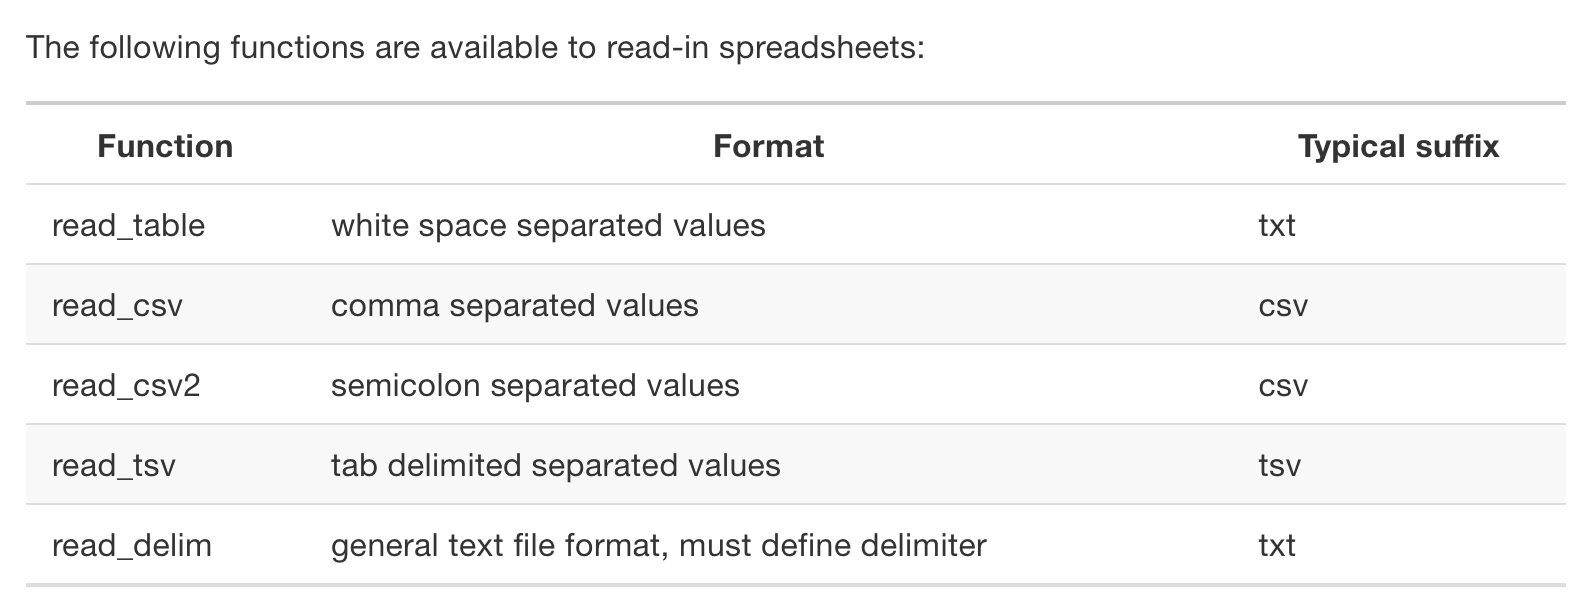

In [35]:
read_lines("murders.csv", n_max = 3)
dat <- read_csv(filename, show_col_types = FALSE)
print(dat)
#A tibble, or tbl_df, is a modern reimagining of the data.frame
#Setting show_col_types = FALSE means that the function will not display the inferred column types in the output.

[1] "state,abb,region,population,total" "Alabama,AL,South,4779736,135"     
[3] "Alaska,AK,West,710231,19"

# A tibble: 51 × 5
   state                abb   region    population total
   <chr>                <chr> <chr>          <dbl> <dbl>
 1 Alabama              AL    South        4779736   135
 2 Alaska               AK    West          710231    19
 3 Arizona              AZ    West         6392017   232
 4 Arkansas             AR    South        2915918    93
 5 California           CA    West        37253956  1257
 6 Colorado             CO    West         5029196    65
 7 Connecticut          CT    Northeast    3574097    97
 8 Delaware             DE    South         897934    38
 9 District of Columbia DC    South         601723    99
10 Florida              FL    South       19687653   669
# … with 41 more rows


In [29]:
#You can load the readxl package using
library(readxl)

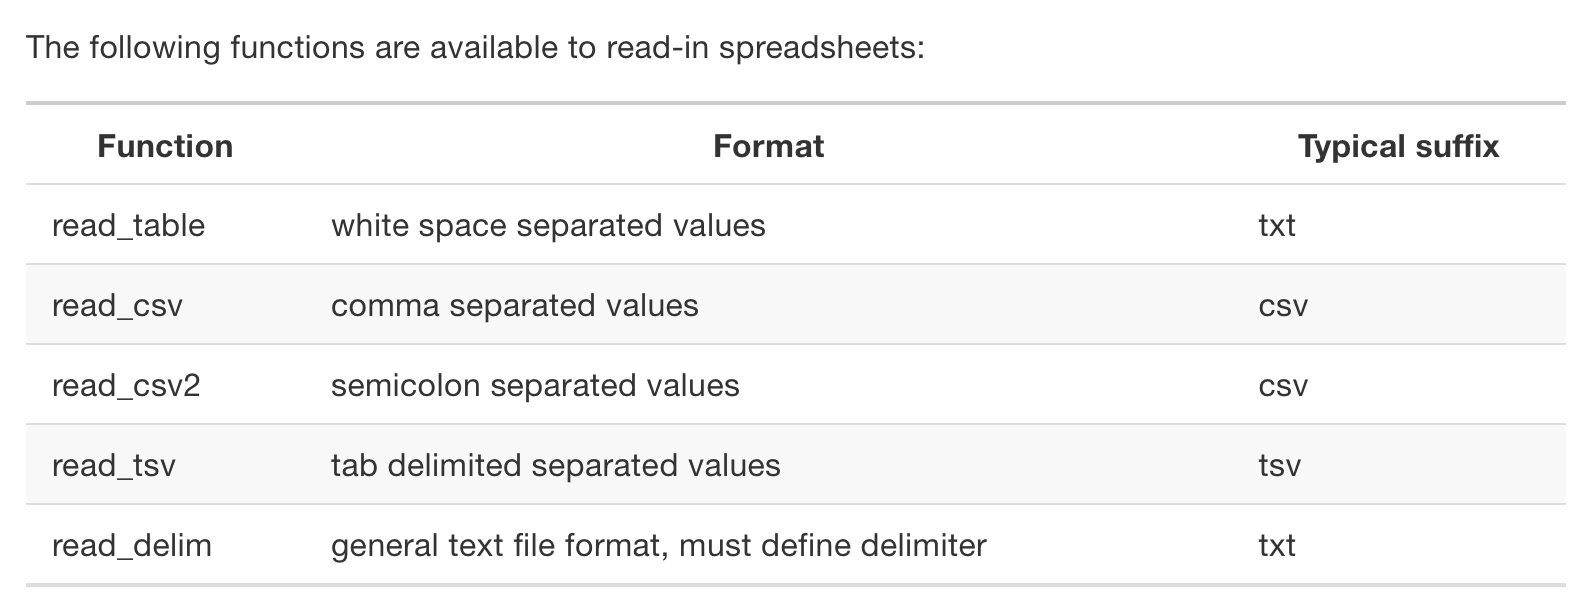

Downloading files:

In [37]:
url <- "https://raw.githubusercontent.com/rafalab/dslabs/master/inst/extdata/murders.csv"
dat <- read_csv(url, show_col_types = FALSE)

download.file(url, "murders.csv")

### Cleaning data

In this section, we’ll address issues that you discovered during the data exploration/visualization phase, in particular, invalid and missing values. Missing values in data happen quite commonly, and the way you treat them is generally the same from project to project. Handling invalid values is often domain-specific: which values are invalid, and what you do about them, depends on the problem that you are trying to solve.

Source: Nina Zumel & John Mount (2020). Practical Data Science with R. Manning, second edition. ISBN: 9781617291562

In [50]:
#https://github.com/WinVector/PDSwR2/tree/master/Custdata

customer_data = readRDS("custdata.RDS")
summary(customer_data)

#The variable is_employed is missing for about a third of the data. 
#The variable income has negative values, which are potentially invalid.
#The variables housing_type, recent_move, num_vehicles, and gas_usage are each missing 1720 or 1721 values.

    custid              sex        is_employed         income       
 Length:73262       Female:37837   Mode :logical   Min.   :  -6900  
 Class :character   Male  :35425   FALSE:2351      1st Qu.:  10700  
 Mode  :character                  TRUE :45137     Median :  26200  
                                   NA's :25774     Mean   :  41764  
                                                   3rd Qu.:  51700  
                                                   Max.   :1257000  
                                                                    
            marital_status  health_ins     
 Divorced/Separated:10693   Mode :logical  
 Married           :38400   FALSE:7307     
 Never married     :19407   TRUE :65955    
 Widowed           : 4762                  
                                           
                                           
                                           
                       housing_type   recent_move      num_vehicles  
 Homeowner free and clear 

Spotting problems using graphics and visualization:

In [51]:
summary(customer_data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   34.00   48.00   49.16   62.00  120.00 

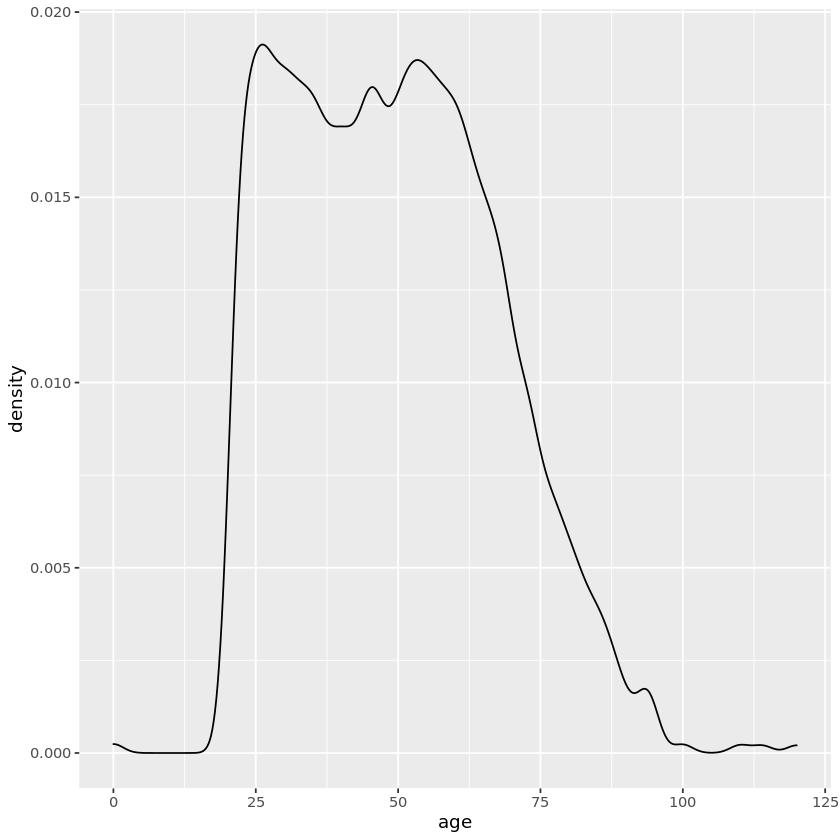

In [35]:
library(ggplot2)
p <- ggplot(customer_data, aes(x=age)) + geom_density()
p

#Invalid values at the beginning (o to 17)?
#Curious blip around 90. Data input problem?
#Outliers around 100 and 125

In [77]:
# A quick way to treat the age and income variables is to convert the invalid values to NA, 
#as if they were missing variables. 

customer_data <- customer_data %>%
        mutate(age = na_if(age, 0), income = ifelse(income < 0, NA, income))

print(customer_data[is.na(customer_data$age), ])

            custid    sex is_employed income     marital_status health_ins
823   000881186_01   Male        TRUE  50000      Never married      FALSE
1773  000054490_02   Male       FALSE      0            Married       TRUE
2332  000432667_03 Female        TRUE  24700      Never married       TRUE
3304  001119983_05 Female        TRUE   2400 Divorced/Separated       TRUE
4048  000377914_02 Female          NA   9700            Married       TRUE
7108  000294100_02   Male        TRUE  65000            Married       TRUE
7305  000320642_01   Male        TRUE 140000            Married       TRUE
9315  000567847_01 Female        TRUE   8500            Married       TRUE
12344 000940662_02   Male        TRUE 100000      Never married       TRUE
13105 001037248_02 Female          NA      0 Divorced/Separated       TRUE
13162 001044459_03   Male          NA      0      Never married       TRUE
13353 001067824_02   Male        TRUE   4000            Married       TRUE
13546 001092857_01 Female

Treating missing values:

In [78]:
count_missing = function(df) {
   sapply(df, FUN=function(col) sum(is.na(col)) )
}
          
help(sapply)          

In [79]:
nacounts <- count_missing(customer_data)
hasNA = which(nacounts > 0)
nacounts[hasNA]

is_employed       income housing_type  recent_move num_vehicles          age 
       25774           45         1720         1721         1720           77 
   gas_usage 
        1720

Fundamentally, there are two things you can do with these variables: drop the rows with missing values, or convert the missing values to a meaningful value. For variables like income or age that have very few missing values relative to the size of the data (customer_data has 73,262 rows), it could be safe to drop the rows. It wouldn’t be safe to drop rows from variables like is_employed or gas_usage, where a large fraction of the values is missing.

Even a few missing values can lose all your data:

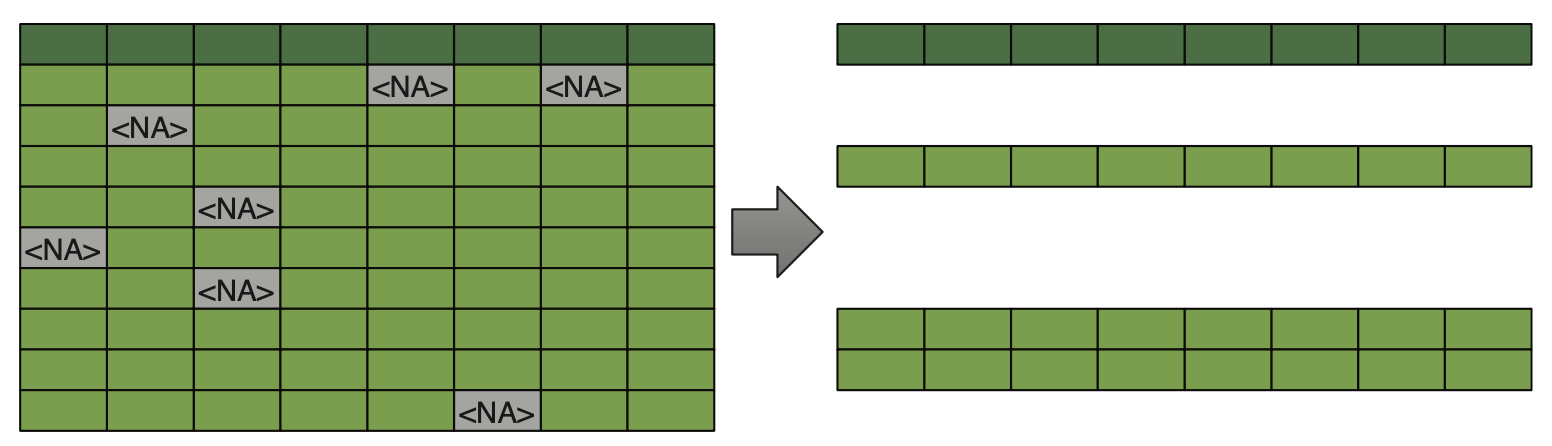

Missing data in categorical variables:

When the variable with missing values is categorical, an easy solution is to create a new category for the variable, called, for instance, missing or _invalid_. 

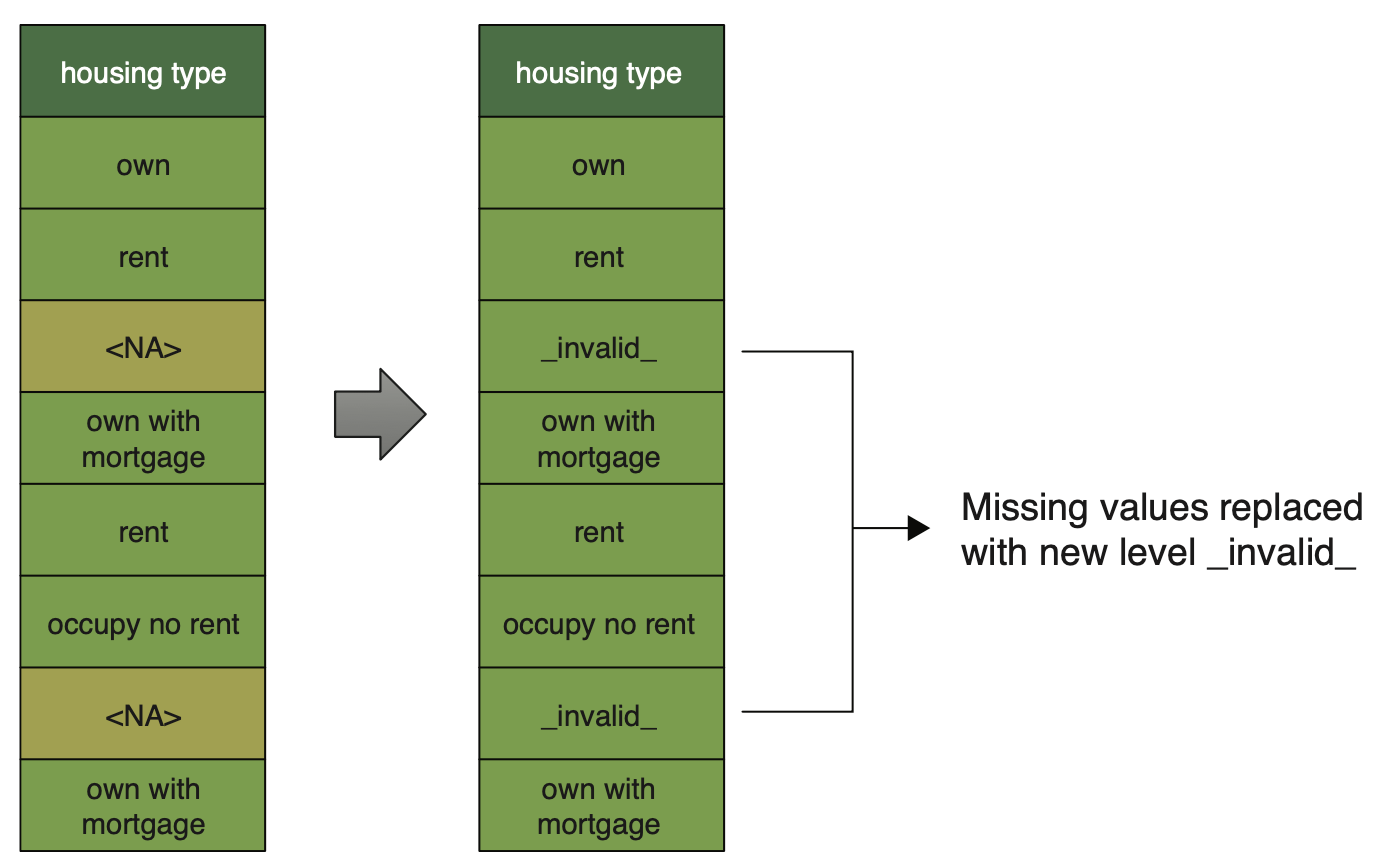

Missing values in numeric or logical variables

Suppose your income variable were missing substantial data (i.e., so many null values). You believe that income is still an important predictor of the probability of health insurance coverage, so you still want to use the variable. What do you do? This can depend on why you think the data is missing.

You can replace the missing values with a “reasonable estimate,” or imputed value. Statistically, one commonly used estimate is the expected, or mean, income.

Assuming that the customers with missing income are distributed the same way as the others, replacing missing values with the mean will be correct on average. It’s also an easy fix to implement. 

CAUTION: It’s possible that the customers with missing income data are systematically different from the others. For instance, it could be the case that the customers with missing income information truly have no income, because they are full-time students or stay-at-home spouses or otherwise not in the active workforce. If this is so, then “filling in” their income information by using one of the preceding methods is an insufficient treatment, and may lead to false conclusions.

The text R in Action, Second Edition (Robert Kabacoff, 2014, http://mng.bz/ybS4) includes an extensive discussion of several value imputation methods available in R.

The vtreat package for automatically treating missing variables

In [59]:
#install.packages("vtreat")
customer_data <- readRDS("custdata.RDS")

colnames(customer_data)

varlist <- setdiff(colnames(customer_data), c("custid", "health_ins")) #it excludes two columns

varlist

library(vtreat)
        treatment_plan <-
              design_missingness_treatment(customer_data, varlist = varlist)
        training_prepared <- prepare(treatment_plan, customer_data)

[1] "custid"         "sex"            "is_employed"    "income"        
 [5] "marital_status" "health_ins"     "housing_type"   "recent_move"   
 [9] "num_vehicles"   "age"            "state_of_res"   "gas_usage"

[1] "sex"            "is_employed"    "income"         "marital_status"
 [5] "housing_type"   "recent_move"    "num_vehicles"   "age"           
 [9] "state_of_res"   "gas_usage"

In [83]:
colnames(customer_data)

colnames(training_prepared)
#The prepared data has additional columns that are not in the original data, 
#most importantly those with the _isBAD designation.

head(customer_data)
#vs.
head(training_prepared)

[1] "custid"         "sex"            "is_employed"    "income"        
 [5] "marital_status" "health_ins"     "housing_type"   "recent_move"   
 [9] "num_vehicles"   "age"            "state_of_res"   "gas_usage"

[1] "custid"             "health_ins"         "sex"               
 [4] "is_employed"        "is_employed_isBAD"  "income"            
 [7] "marital_status"     "housing_type"       "recent_move"       
[10] "recent_move_isBAD"  "num_vehicles"       "num_vehicles_isBAD"
[13] "age"                "state_of_res"       "gas_usage"         
[16] "gas_usage_isBAD"

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,recent_move,num_vehicles,age,state_of_res,gas_usage
,<chr>,<fct>,<lgl>,<dbl>,<fct>,<lgl>,<fct>,<lgl>,<dbl>,<dbl>,<fct>,<dbl>
7,000006646_03,Male,TRUE,22000,Never married,TRUE,Homeowner free and clear,FALSE,0,24,Alabama,210
8,000007827_01,Female,NA,23200,Divorced/Separated,TRUE,Rented,TRUE,0,82,Alabama,3
9,000008359_04,Female,TRUE,21000,Never married,TRUE,Homeowner with mortgage/loan,FALSE,2,31,Alabama,40
10,000008529_01,Female,NA,37770,Widowed,TRUE,Homeowner free and clear,FALSE,1,93,Alabama,120
11,000008744_02,Male,TRUE,39000,Divorced/Separated,TRUE,Rented,FALSE,2,67,Alabama,3
15,000011466_01,Male,NA,11100,Married,TRUE,Homeowner free and clear,FALSE,2,76,Alabama,200


,custid,health_ins,sex,is_employed,is_employed_isBAD,income,marital_status,housing_type,recent_move,recent_move_isBAD,num_vehicles,num_vehicles_isBAD,age,state_of_res,gas_usage,gas_usage_isBAD
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
7,000006646_03,TRUE,Male,1.0000000,0,22000,Never married,Homeowner free and clear,0,0,0,0,24,Alabama,210,0
8,000007827_01,TRUE,Female,0.9504928,1,23200,Divorced/Separated,Rented,1,0,0,0,82,Alabama,3,0
9,000008359_04,TRUE,Female,1.0000000,0,21000,Never married,Homeowner with mortgage/loan,0,0,2,0,31,Alabama,40,0
10,000008529_01,TRUE,Female,0.9504928,1,37770,Widowed,Homeowner free and clear,0,0,1,0,93,Alabama,120,0
11,000008744_02,TRUE,Male,1.0000000,0,39000,Divorced/Separated,Rented,0,0,2,0,67,Alabama,3,0
15,000011466_01,TRUE,Male,0.9504928,1,11100,Married,Homeowner free and clear,0,0,2,0,76,Alabama,200,0


In [63]:
nacounts <- sapply(training_prepared, FUN=function(col) sum(is.na(col)) )
sum(nacounts) #The prepared data has no missing values.

[1] 0

In [65]:
#Finds the rows where housing_type was missing:
htmissing <- which(is.na(customer_data$housing_type))

#Looks at a few columns from those rows in the ORIGINAL data:
columns_to_look_at <- c("custid", "is_employed", "num_vehicles",
                               "housing_type", "health_ins")
customer_data[htmissing, columns_to_look_at]

,custid,is_employed,num_vehicles,housing_type,health_ins
,<chr>,<lgl>,<dbl>,<fct>,<lgl>
80,000082691_01,TRUE,NA,NA,FALSE
100,000116191_01,TRUE,NA,NA,TRUE
237,000269295_01,NA,NA,NA,FALSE
299,000349708_01,NA,NA,NA,FALSE
311,000362630_01,NA,NA,NA,TRUE
413,000443953_01,NA,NA,NA,TRUE
438,000474922_01,NA,NA,NA,TRUE
454,000490510_01,NA,NA,NA,TRUE
479,000513710_01,NA,NA,NA,TRUE


In [75]:
columns_to_look_at = c("custid", "is_employed", "is_employed_isBAD",
                       "num_vehicles","num_vehicles_isBAD",
                       "housing_type", "health_ins")

#Looks at those rows and columns in the treated data (along with the isBADs):
training_prepared[htmissing, columns_to_look_at] 

#You see that vtreat replaced missing values of the categorical variable housing_type with the token invalid, 
#and missing values of the numerical column num_vehicles with its average value in the original data. 
#It also converted the logical variable is_employed to a numeric variable, and replaced missing values 
#with its average value in the original data.

,custid,is_employed,is_employed_isBAD,num_vehicles,num_vehicles_isBAD,housing_type,health_ins
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
80,000082691_01,1.0000000,0,2.0655,1,_invalid_,FALSE
100,000116191_01,1.0000000,0,2.0655,1,_invalid_,TRUE
237,000269295_01,0.9504928,1,2.0655,1,_invalid_,FALSE
299,000349708_01,0.9504928,1,2.0655,1,_invalid_,FALSE
311,000362630_01,0.9504928,1,2.0655,1,_invalid_,TRUE
413,000443953_01,0.9504928,1,2.0655,1,_invalid_,TRUE
438,000474922_01,0.9504928,1,2.0655,1,_invalid_,TRUE
454,000490510_01,0.9504928,1,2.0655,1,_invalid_,TRUE
479,000513710_01,0.9504928,1,2.0655,1,_invalid_,TRUE


,custid,health_ins,sex,is_employed,is_employed_isBAD,income,marital_status,housing_type,recent_move,recent_move_isBAD,num_vehicles,num_vehicles_isBAD,age,state_of_res,gas_usage,gas_usage_isBAD
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
7,000006646_03,TRUE,Male,1.0000000,0,22000,Never married,Homeowner free and clear,0,0,0,0,24,Alabama,210,0
8,000007827_01,TRUE,Female,0.9504928,1,23200,Divorced/Separated,Rented,1,0,0,0,82,Alabama,3,0
9,000008359_04,TRUE,Female,1.0000000,0,21000,Never married,Homeowner with mortgage/loan,0,0,2,0,31,Alabama,40,0
10,000008529_01,TRUE,Female,0.9504928,1,37770,Widowed,Homeowner free and clear,0,0,1,0,93,Alabama,120,0
11,000008744_02,TRUE,Male,1.0000000,0,39000,Divorced/Separated,Rented,0,0,2,0,67,Alabama,3,0
15,000011466_01,TRUE,Male,0.9504928,1,11100,Married,Homeowner free and clear,0,0,2,0,76,Alabama,200,0
